# Capstone Project - The Battle of Neighborhoods (Week 1 & 2)

## Introduction / Business Problem

As my capstone project, I decided to take a general approach to the capstone's contents and deliver a final project that could give a simplified overview of what I learned in the professional certification.
I decided to make my project about venues in London, as it's a city I'd like to live in and there is a lot of data available about it, so it was a good place to start with.

From the Business perspective, my project will be about projecting into a map all the London's Wards, as to have the data available for future investment projections and to detect areas of opportunity to open a cafe-restaurant. On a second point, I'll be using that data and the post codes to detect the venues geographical concentration and detect areas where business hasn't developed as well, and to detect the best area to open any kind of business, considering a positive correlation between actual presence of any kind of specific business and its future success.

## Describing the data

I obtained the data from Doogal, which has many databases about U.K. (mainly about postcodes and maps), so I filtered the needed data to accomplish the defined goals, and then I continued to geotag all the obtained geographical coordenates through the geopy library; having all the information available, I plotted all the Wards (to verify the data) and to detect dispersion and over-abundance of wards.

I continued to create a database of local venues, concentrating on the city centre, having them dispersed to a limit of 100 and a radius of 1000. Having detected and plotted the venue geographical dispersion, we can start to evaluate the ubication of a prospect business, but not without analyzing which kind of venue has the most presence in the geographical section (and thus determining which kind of business will have the most impact). Lastly, I plotted in a bar-graph the business presence within the city's centre.

### I start with importing the basic libraries

In [117]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim 
import folium 
import requests
print('Libraries ready.')

Libraries ready.


### Calling the information from Doogal's CSV containing all the data we're going to need

In [88]:
csv_path='https://www.doogal.co.uk/AdministrativeAreasCSV.ashx?district=E09000001'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data loaded')

Data loaded


### Showing the data and filering all needed information

In [89]:
df.head()

Postcode In Use?   Latitude  Longitude  Easting  Northing  Grid Ref  \
0   E1 6AN     Yes  51.518895  -0.078378   533425    181747  TQ334817   
1   E1 7AA     Yes  51.515567  -0.075635   533625    181382  TQ336813   
2   E1 7AD     Yes  51.515457  -0.076718   533550    181368  TQ335813   
3   E1 7AE     Yes  51.515613  -0.076899   533537    181385  TQ335813   
4   E1 7AF     Yes  51.515613  -0.076899   533537    181385  TQ335813   

          Ward                           Parish  Introduced Terminated  \
0  Bishopsgate  City of London, unparished area  1980-01-01        NaN   
1    Portsoken  City of London, unparished area  2000-12-01        NaN   
2    Portsoken  City of London, unparished area  2013-09-01        NaN   
3    Portsoken  City of London, unparished area  2013-07-01        NaN   
4    Portsoken  City of London, unparished area  2013-01-01        NaN   

   Altitude  Country Last Updated  \
0        32  England   2020-06-03   
1        28  England   2020-06-03   
2        31  England   2020-06-03   
3        30  England   2020-06-03   
4        30  England   2020-06-03   

                                             Quality  LSOA Code  \
0  Within the building of the matched address clo...  E01032739   
1  Within the building of the matched address clo...  E01000005   
2  Within the building of the matched address clo...  E01000005   
3  Within the building of the matched address clo...  E01000005   
4  Within the building of the matched address clo...  E01000005   

             LSOA Name  
0  City of London 001F  
1  City of London 001E  
2  City of London 001E  
3  City of London 001E  
4  City of London 001E

In [90]:
df.columns = ('Postcode','B','Latitude', 'Longitude', 'Del' ,'Northing', 'Grid_Ref','Ward','Parish','Introduced','Terminated','Altitude','Country','Last Updated','Quality','LSOA Code','delete')
df.drop(columns=["B"], inplace=True)
df.drop(columns=["Del"], inplace=True)
df.drop(columns=["Northing"], inplace=True)
df.drop(columns=["Grid_Ref"], inplace=True)
df.drop(columns=["Parish"], inplace=True)
df.drop(columns=["Introduced"], inplace=True)
df.drop(columns=["Terminated"], inplace=True)
df.drop(columns=["Altitude"], inplace=True)
df.drop(columns=["Quality"], inplace=True)
df.drop(columns=["LSOA Code"], inplace=True)
df.drop(columns=["delete"], inplace=True)
df.head()

Postcode   Latitude  Longitude         Ward  Country Last Updated
0   E1 6AN  51.518895  -0.078378  Bishopsgate  England   2020-06-03
1   E1 7AA  51.515567  -0.075635    Portsoken  England   2020-06-03
2   E1 7AD  51.515457  -0.076718    Portsoken  England   2020-06-03
3   E1 7AE  51.515613  -0.076899    Portsoken  England   2020-06-03
4   E1 7AF  51.515613  -0.076899    Portsoken  England   2020-06-03

In [91]:
from geopy.geocoders import Nominatim
address = 'London'

geolocator = Nominatim(user_agent="Explorer55875")
location = geolocator.geocode(address)
Lonlat = location.latitude
Lonlong = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(Lonlat, Lonlong))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [123]:
df.to_csv('Wards1')
df.head()

Postcode   Latitude  Longitude         Ward  Country Last Updated
0   E1 6AN  51.518895  -0.078378  Bishopsgate  England   2020-06-03
1   E1 7AA  51.515567  -0.075635    Portsoken  England   2020-06-03
2   E1 7AD  51.515457  -0.076718    Portsoken  England   2020-06-03
3   E1 7AE  51.515613  -0.076899    Portsoken  England   2020-06-03
4   E1 7AF  51.515613  -0.076899    Portsoken  England   2020-06-03

### Having filtered and cleaned the data, I continue to plot what I have thus far

In [96]:
import folium
Wards1 = folium.Map(location=[Lonlat, Lonlong], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], 
                           df['Ward']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Wards1)
    
Wards1

### Using the Foursquare's API 

In [182]:
CLIENT_ID = 'User' 
CLIENT_SECRET = 'Secret' 
VERSION = '20200704' 
LIMIT = 100

*I continued to create a CSV containing the data of a subset, which will be used to plot the Foursquare information*

In [183]:
neighborhoods_subset = pd.read_csv("Wards1")
neighborhoods_subset.head()

Unnamed: 0 Postcode   Latitude  Longitude         Ward  Country  \
0           0   E1 6AN  51.518895  -0.078378  Bishopsgate  England   
1           1   E1 7AA  51.515567  -0.075635    Portsoken  England   
2           2   E1 7AD  51.515457  -0.076718    Portsoken  England   
3           3   E1 7AE  51.515613  -0.076899    Portsoken  England   
4           4   E1 7AF  51.515613  -0.076899    Portsoken  England   

  Last Updated  
0   2020-06-03  
1   2020-06-03  
2   2020-06-03  
3   2020-06-03  
4   2020-06-03

In [185]:
neighborhood_name = neighborhoods_subset.loc[0, 'Ward']
neighborhood_latitude = neighborhoods_subset.loc[0, 'Latitude'] 
neighborhood_longitude = neighborhoods_subset.loc[0, 'Longitude']
radius = 1000

*Having defined the previous variables, I'll continue to use them in our new dataframe (using Foursquare)*

In [186]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
import requests
import folium

*And I continued to clean and filter which data I'll need from the Foursquare new dataframe

In [187]:
venues = results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

name                categories        lat  \
0                Kastner & Ovens                      Café  51.517913   
1                     Ottolenghi  Mediterranean Restaurant  51.518272   
2        Old Spitalfields Market               Flea Market  51.519668   
3  The Mayor of Scaredy Cat Town                 Speakeasy  51.518524   
4                      Gunpowder         Indian Restaurant  51.518436   

        lng  
0 -0.076465  
1 -0.077177  
2 -0.075375  
3 -0.078882  
4 -0.074732

*Here we have a sample of the nearby venues data, extracted from the API using the location data obtained previously*

In [188]:
(nearby_venues.shape[0])

100

*Here I can detect that there is information for 100 venues in the new extracted dataframe, and to continue I'll plot those venues location in a city centre's map*

In [189]:
venues_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
venues_map

*And then I proceed to group count all the different venues present in the city's centre by their category*

In [192]:
print (nearby_venues['categories'].value_counts())

Hotel                            8
Coffee Shop                      7
Gym / Fitness Center             5
Food Truck                       4
Café                             3
Restaurant                       3
Burger Joint                     2
Street Food Gathering            2
Steakhouse                       2
Clothing Store                   2
Flea Market                      2
Bagel Shop                       2
Salon / Barbershop               2
Bookstore                        2
Italian Restaurant               2
Garden                           2
Cocktail Bar                     2
French Restaurant                2
Middle Eastern Restaurant        2
Boxing Gym                       2
Indian Restaurant                2
Salad Place                      2
Event Space                      2
Market                           2
Speakeasy                        1
Fish & Chips Shop                1
Mediterranean Restaurant         1
Colombian Restaurant             1
Chinese Restaurant  

*Lastly, here we have the top 10 venue category within the city's centre, to detect business oportunity and people needs by geopraphical presence*

In [194]:
nearby_venues_Top10 = nearby_venues['categories'].value_counts()[0:10].to_frame(name='frequency')
nearby_venues_Top10=nearby_venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

nearby_venues_Top10.rename(index=str, columns={"index": "categories", "frequency": "Frequency"}, inplace=True)
nearby_venues_Top10

categories  Frequency
0                  Hotel          8
1            Coffee Shop          7
2   Gym / Fitness Center          5
3             Food Truck          4
4                   Café          3
5             Restaurant          3
6           Burger Joint          2
7  Street Food Gathering          2
8             Steakhouse          2
9         Clothing Store          2

*To end with, here we have a bar graph, plotting the category of venues present within the city's centre*

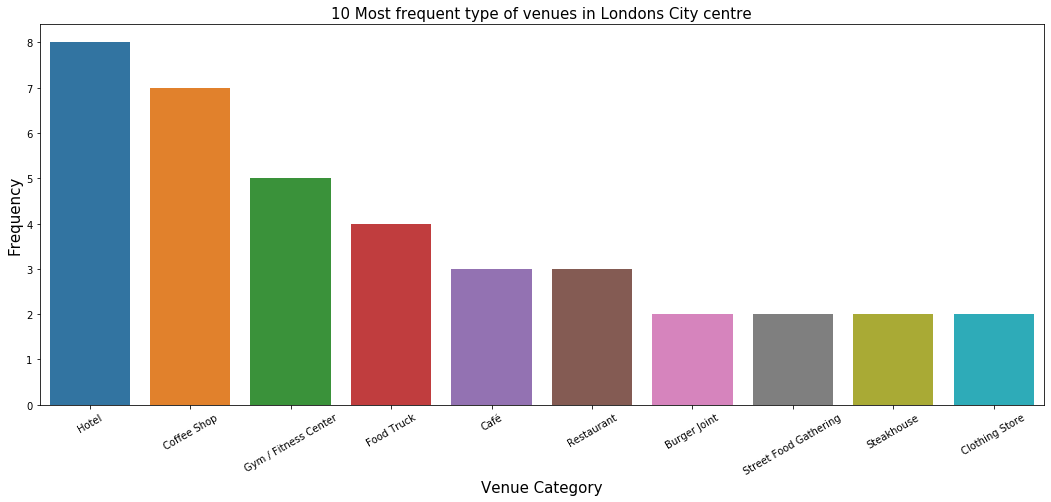

In [200]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="categories", y="Frequency", data=nearby_venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most frequent type of venues in Londons City centre', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("MFTLC.png", dpi=300)
plt.show()

*To conclude, I'd find this information valuable (as well as other kind of information) to evaluate a future investment within the city's centre, as well as to detect any Ward that could be in a need of any kind of new venue*